In [199]:
import numpy as np              # Implemennts milti-dimensional array and matrices
import pandas as pd             # For data manipulation and analysis


import pandas_profiling
import matplotlib.pyplot as plt # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns           # Provides a high level interface for drawing attractive and informative statistical graphics

import seaborn as sns
sns.set_theme(color_codes=True)

%matplotlib inline
sns.set()

from subprocess import check_output

In [2]:
# Importing training dataset using pd.read_csv

titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")    

In [3]:
profile = pandas_profiling.ProfileReport(titanic_data)
profile.to_file(output_file='titanic_before_preprocessing.html')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#preprocessing
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [6]:
median_age = titanic_data.Age.median()
median_age

28.0

In [7]:
titanic_data.Age.fillna(median_age,inplace = True)

In [8]:
titanic_data.drop('Cabin',axis = 1,inplace = True)

In [9]:
titanic_data['Fare'] = titanic_data['Fare'].replace(0,titanic_data['Fare'].median())

In [10]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

In [11]:
titanic_data['Genderclass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis = 1)

In [12]:
titanic_data[titanic_data.Age < 15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Genderclass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [13]:
titanic_data[titanic_data.Age > 15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Genderclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


Text(0.5, 1.0, 'Count plot for survived.')

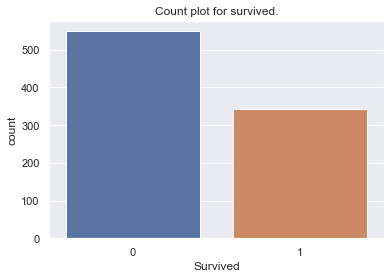

In [14]:
#Of all the passengers, how many survived and how many died ?

sns.countplot(x='Survived', data=titanic_data).set_title('Count plot for survived.')

In [15]:
titanic_data.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Age distribution using FacetGrid')

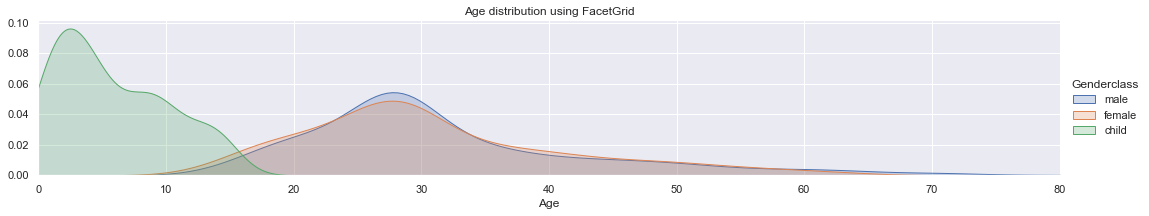

In [16]:
#Who is more likely to survive, Male or Female?

as_fig = sns.FacetGrid(titanic_data,hue='Genderclass',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_data['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

plt.title('Age distribution using FacetGrid')

In [17]:
titanic_data.groupby(['Survived','Genderclass'])['Survived'].count()

Survived  Genderclass
0         child           33
          female          66
          male           450
1         child           45
          female         209
          male            88
Name: Survived, dtype: int64

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


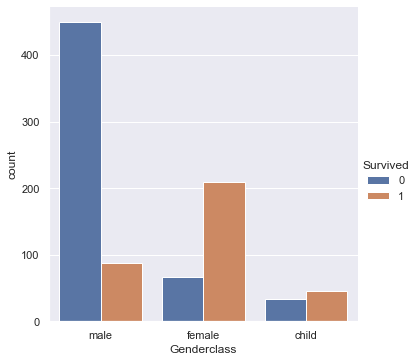

In [18]:
#factorplot

sns.factorplot('Genderclass',hue = 'Survived',kind = 'count',data = titanic_data)
plt.title = ('Factor plot for male female and child')

In [19]:
#to know exact %

print("% of women survived: " , titanic_data[titanic_data.Genderclass == 'female']['Survived'].sum()/
                                titanic_data[titanic_data.Genderclass == 'female']['Survived'].count())

% of women survived:  0.76


In [21]:
print("% of men survived:   " , titanic_data[titanic_data.Genderclass == 'male']['Survived'].sum()/
                                titanic_data[titanic_data.Genderclass == 'male']['Survived'].count())

% of men survived:    0.16356877323420074


In [22]:
print("% of child survived:   " , titanic_data[titanic_data.Genderclass == 'child']['Survived'].sum()/
                                  titanic_data[titanic_data.Genderclass == 'child']['Survived'].count())

% of child survived:    0.5769230769230769


Text(0.5, 1.0, 'Survived (child)')

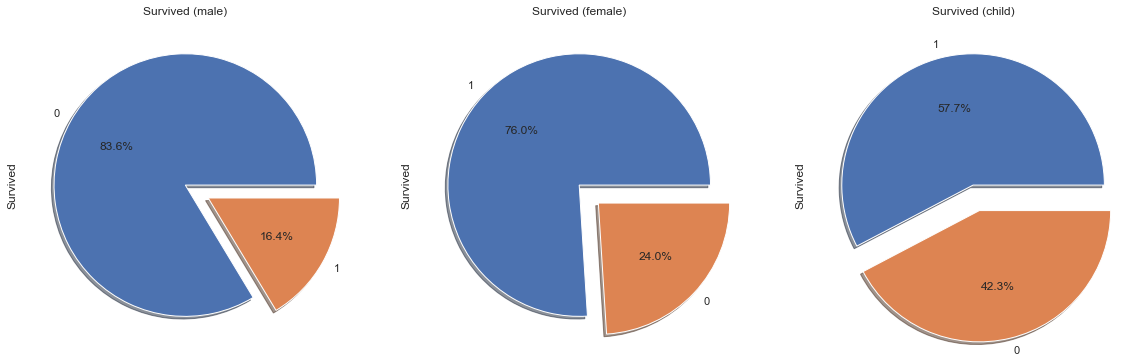

In [25]:
#pie plot

f,ax = plt.subplots(1,3,figsize=(20,7))
titanic_data['Survived'][titanic_data['Genderclass'] == 'male'].value_counts().plot.pie(explode=[0,0.2],
                                                                                                    autopct='%1.1f%%',ax=ax[0],shadow=True)
titanic_data['Survived'][titanic_data['Genderclass'] == 'female'].value_counts().plot.pie(explode=[0,0.2],
                                                                                                    autopct='%1.1f%%',ax=ax[1],shadow=True)
titanic_data['Survived'][titanic_data['Genderclass'] == 'child'].value_counts().plot.pie(explode=[0,0.2],
                                                                                                    autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
ax[2].set_title('Survived (child)')

In [26]:
titanic_data['Survived'][titanic_data['Genderclass'] == 'male'].value_counts()

0    450
1     88
Name: Survived, dtype: int64

In [50]:
titanic_data['Survived'][titanic_data['Genderclass'] == 'female'].value_counts()

1    209
0     66
Name: Survived, dtype: int64

In [51]:
titanic_data['Survived'][titanic_data['Genderclass'] == 'child'].value_counts()

1    45
0    33
Name: Survived, dtype: int64

In [52]:
(titanic_data.Survived == 0).sum()

549

In [30]:
# video24 line 17 of the file
#Of all the passengers, how many survived and how many died ?
# based on question

#titanic_data.groupby(['Survived','Genderclass'])['Survived'].count()

Survived  Genderclass
0         child           33
          female          66
          male           450
1         child           45
          female         209
          male            88
Name: Survived, dtype: int64

In [31]:
# based on understanding, better view of data representation

#titanic_data.groupby(['Genderclass','Survived'])['Survived'].count()

Genderclass  Survived
child        0            33
             1            45
female       0            66
             1           209
male         0           450
             1            88
Name: Survived, dtype: int64

In [41]:
# line 19-22 for answer to have only 2 decimal value use round()

#print("% of women survived: " , titanic_data[titanic_data.Genderclass == 'female']
                                      ['Survived'].sum()/titanic_data[titanic_data.Genderclass == 'female']['Survived'].count())
#print("% of men survived:   " , (titanic_data[titanic_data.Genderclass == 'male']
                                        ['Survived'].sum()/titanic_data[titanic_data.Genderclass == 'male']['Survived'].count()).round(2))
#print("% of child survived: " , (titanic_data[titanic_data.Genderclass == 'child']
                                       ['Survived'].sum()/titanic_data[titanic_data.Genderclass == 'child']['Survived'].count()).round(4))

% of women survived:  0.76
% of men survived:    0.16
% of child survived:  0.5769


Text(0.5, 1.0, 'Survived (child)')

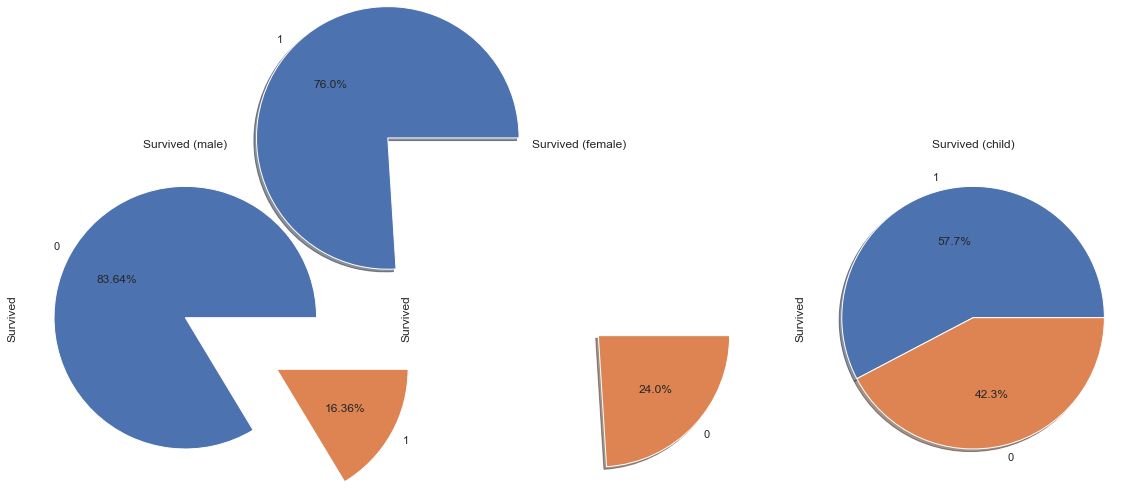

In [49]:
# pie plot line 25
# if shadow is false
# if explode = [0,0.8] or [0,0] or [2,0.2]
# if autopct = 1.2 it gives 2 values after point


#f,ax = plt.subplots(1,3,figsize=(20,7))
#titanic_data['Survived'][titanic_data['Genderclass'] ==
#                         'male'].value_counts().plot.pie(explode=[0,0.8],autopct='%1.2f%%',ax=ax[0],shadow=False)
#titanic_data['Survived'][titanic_data['Genderclass'] == 
#                         'female'].value_counts().plot.pie(explode=[2,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
#titanic_data['Survived'][titanic_data['Genderclass'] == 
#                         'child'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[2],shadow=True)


#ax[0].set_title('Survived (male)')
#ax[1].set_title('Survived (female)')
#ax[2].set_title('Survived (child)')

In [76]:
# CONTINUATION>>>


# DONUT pie chart to see the relationship between survival and gender
def func(pct,allvals):
    ablosute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d}g)".format(pct,absolute)


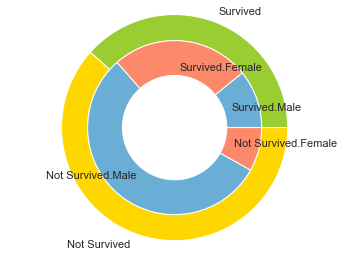

In [104]:

import matplotlib.pyplot as plt

group_names = ['Survived', 'Not Survived']
group_size = [342, 549]
subgroup_names = ['Survived.Male', 'Survived.Female', 'Not Survived.Male', 'Not Survived.Female']
subgroup_size = [88, 209,450,66]

a, b, c = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

fig, ax = plt.subplots()
ax.axis('equal')

mypie,_ = ax.pie(group_size,
                 radius = 1.3,
                 labels = group_names,
                 colors = ['yellowgreen', 'gold'])
plt.setp(mypie, width = 0.3, edgecolor = 'white')

mypie2,_ = ax.pie(subgroup_size,
                  radius = 1.3-0.3,
                  labels = subgroup_names,
                  labeldistance = 0.7,
                  colors = [a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp(mypie2, width = 0.4, edgecolor = 'white')

plt.margins(0,0)
#plt.title("Donut plot")
plt.show()


In [107]:
# rate of survials of male, female and child

print("% of survivals in")
print("Pclass = 1 :", titanic_data.Survived[titanic_data.Pclass == 1].sum()/
                                            titanic_data[titanic_data.Pclass == 1].Survived.count())
print("Pclass = 2 :", titanic_data.Survived[titanic_data.Pclass == 2].sum()/
                                            titanic_data[titanic_data.Pclass == 2].Survived.count())
print("Pclass = 3 :", titanic_data.Survived[titanic_data.Pclass == 3].sum()/
                                            titanic_data[titanic_data.Pclass == 3].Survived.count())

% of survivals in
Pclass = 1 : 0.6296296296296297
Pclass = 2 : 0.47282608695652173
Pclass = 3 : 0.24236252545824846


In [113]:
# CROSS TAB FUNCTION --> row is column, colum is row

pd.crosstab([titanic_data.Genderclass, titanic_data.Survived],
        titanic_data.Pclass,margins = True).apply(lambda r :100*r/len(titanic_data), axis = 1).style.background_gradient(cmap = 'autumn_r')

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


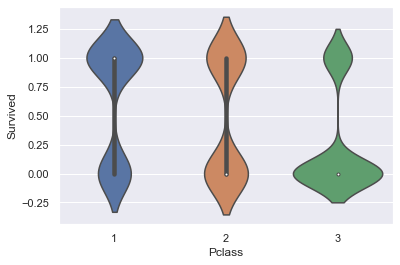

In [197]:
# VIOLIN PLOT 

sns.violinplot('Pclass','Survived', kind= 'point', data = titanic_data)
#plt.title("Violin Plot Pclass Vs Survived") 
plt.show()

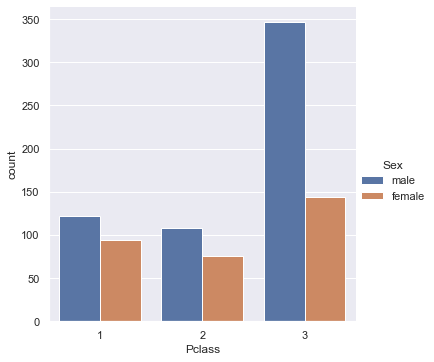

In [229]:
#CHECK

# FACTOR PLOT
# factor lot with kind = "count" for Pclass and Genderclass

sns.factorplot('Pclass', data = titanic_data, hue = 'Sex', kind = 'count')
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


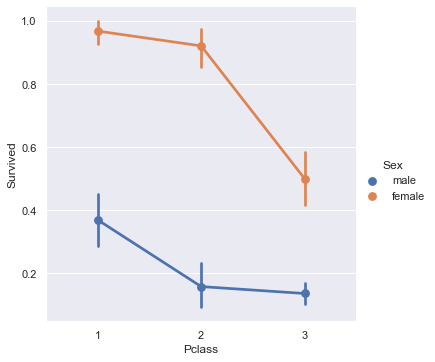

In [230]:
# factor plot for survived rate varition with pclass  and genderclass

sns.factorplot('Pclass', 'Survived', data = titanic_data, hue = 'Sex')

plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

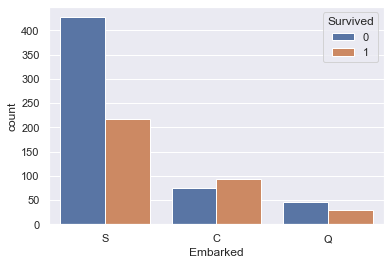

In [239]:
# COUNT PLOT

sns.countplot('Embarked', data = titanic_data ,hue = 'Survived')


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

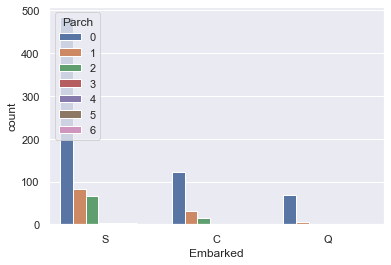

In [242]:
sns.countplot('Embarked', data = titanic_data ,hue = 'Parch')

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


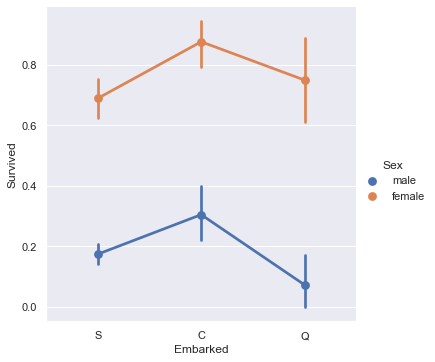

In [245]:
sns.factorplot('Embarked',
              'Survived',
              hue = 'Sex',
              kind = 'point',
              data = titanic_data)

In [249]:
# CROSS TAB

relation = pd.crosstab(titanic_data.Embarked, titanic_data.Pclass)
relation

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


(array([0, 1, 2]), [Text(0, 0, 'C'), Text(0, 1, 'Q'), Text(0, 2, 'S')])

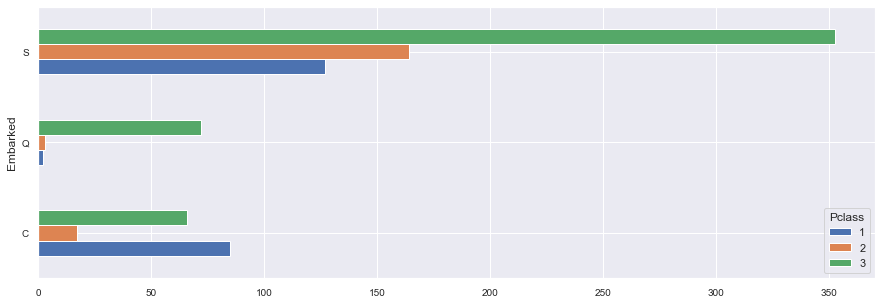

In [248]:

relation = pd.crosstab(titanic_data.Embarked, titanic_data.Pclass)
relation.plot.barh(figsize = (15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.title('Relation between Pclass and Embarked', size = 20)

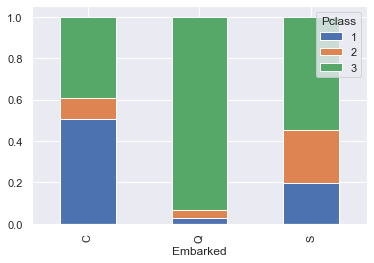

In [250]:
#stacked plot - it uses bar plot

dummy = relation.div(relation.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
dummy = plt.xlabel('Embarked')

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Embarked', ylabel='Age'>

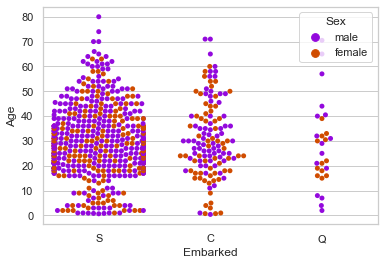

In [252]:
# Swarmplot
# shows distribution of data

sns.set(style = 'whitegrid', palette = 'muted')
sns.swarmplot(x = 'Embarked', y = 'Age', hue = 'Sex', palette = 'gnuplot', data = titanic_data)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


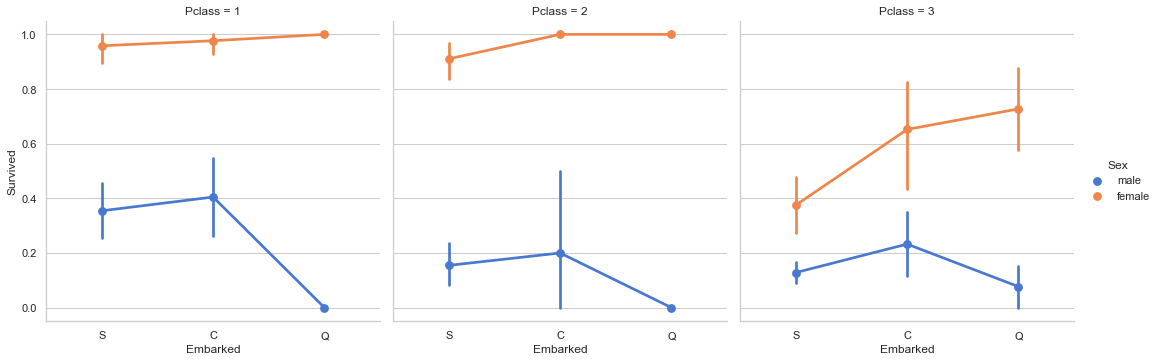

In [254]:
sns.factorplot('Embarked', 'Survived', col = 'Pclass', hue = 'Sex', kind = 'point', data = titanic_data)
plt.show()

In [256]:
# SEGMENT AGE IN BINS WITH SIZE 10

for i in range(8, 0, -1):
    titanic_data.loc[titanic_data['Age'] <= i*10, 'Age_bin'] = i

In [257]:
print(titanic_data[['Age', 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


<AxesSubplot:xlabel='Age_bin', ylabel='Survived'>

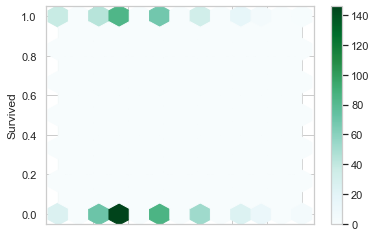

In [258]:
titanic_data.plot.hexbin(x = 'Age_bin', y ='Survived', gridsize = 12)

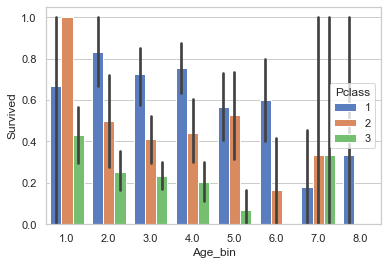

In [260]:
sns.barplot(x = 'Age_bin', y ='Survived', hue = 'Pclass', data = titanic_data)
plt.show()

In [261]:
titanic_data[(titanic_data.Age_bin == 1)]['Pclass'].value_counts()

3    44
2    17
1     3
Name: Pclass, dtype: int64

In [265]:
titanic_data[(titanic_data.Age_bin == 1)&(titanic_data.Pclass == 1)]['Survived']

297    0
305    1
445    1
Name: Survived, dtype: int64

In [263]:
titanic_data[(titanic_data.Age_bin == 8)]['Pclass'].value_counts()

1    3
3    2
Name: Pclass, dtype: int64

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


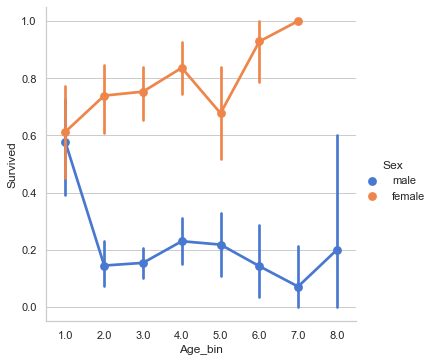

In [266]:
sns.factorplot('Age_bin', 'Survived', hue = 'Sex', kind = 'point', data = titanic_data)
plt.show()
# people have higher priority of survival than male as seen bellow

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


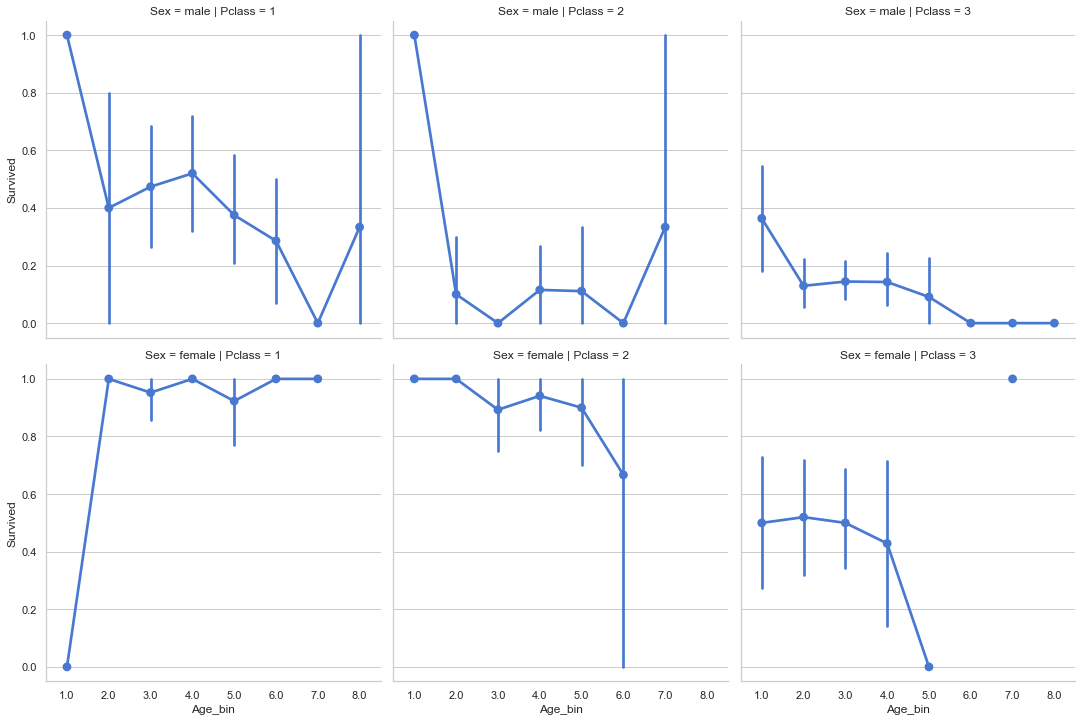

In [267]:
sns.factorplot('Age_bin', 'Survived', col = 'Pclass', row = 'Sex', kind = 'point', data = titanic_data)
plt.show()

In [268]:
# To calculate the number of females from each Pclass in age group1

titanic_data[(titanic_data.Age_bin == 1) & (titanic_data.Sex == 'female')]['Pclass'].value_counts()

3    22
2     8
1     1
Name: Pclass, dtype: int64

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


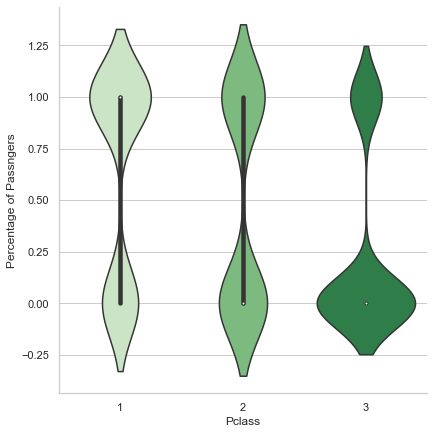

In [274]:
#ANALYSING SURVIVAL RATE WITH FAMILYSIZE --> using factorplot

ax = sns.factorplot(x = 'Pclass', y = 'Survived', data = titanic_data, kind = 'violin', ascept = '1.5', size = 6, palette = 'Greens')
ax.set(ylabel = 'Percentage of Passngers')

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


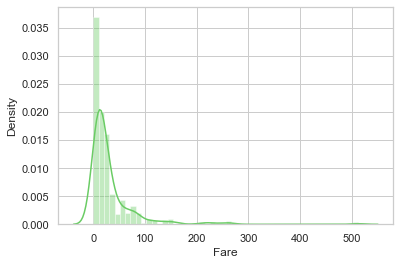

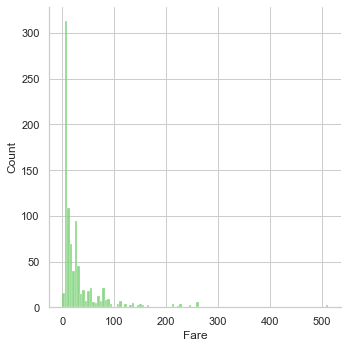

In [284]:
# SEGMENT FARE IN BINS OF SIZE 12

# DISPLOT

sns.distplot(titanic_data['Fare'], color = 'g')
#plt.title("Distrubution")
sns.displot(titanic_data['Fare'], color = 'g')
plt.show()

In [286]:
for i in range(12,0,-1):
    titanic_data.loc[titanic_data['Fare'] <= i*10, 'Fare_bin'] = i
titanic_data.loc[titanic_data['Fare'] > 110, 'Fare_bin'] = 12

print(titanic_data[['Fare','Fare_bin']].groupby('Fare_bin')['Fare'].count())

Fare_bin
1.0     336
2.0     179
3.0     142
4.0      58
5.0      16
6.0      38
7.0      17
8.0      31
9.0      17
10.0      4
11.0      4
12.0     49
Name: Fare, dtype: int64


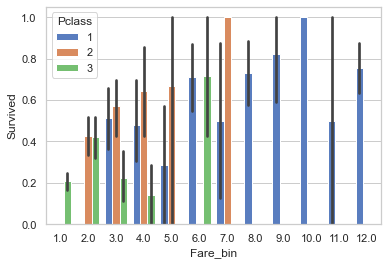

In [287]:
# to plot relation between survival rate, Fare_bin and Pclass
# use BARPLOT

sns.barplot(x = 'Fare_bin', y = 'Survived', hue = 'Pclass', data = titanic_data)
plt.show()

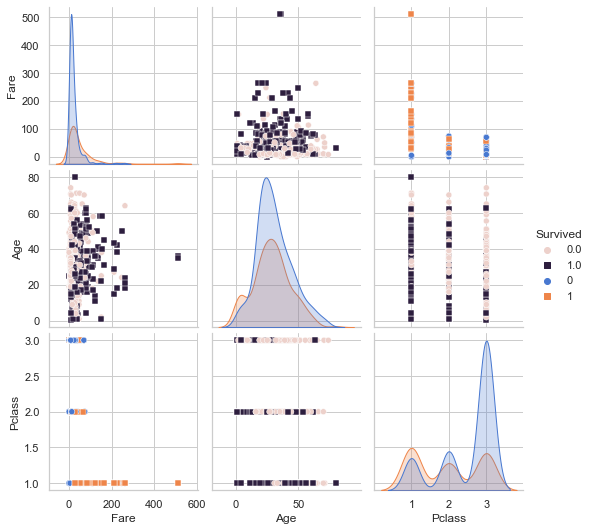

In [292]:
# PAIR PLOT

sns.pairplot(titanic_data[["Fare", "Age", "Pclass", "Survived"]], vars = ["Fare", "Age", "Pclass"],
                                                                hue = "Survived", dropna = True, markers = ["o", "s"])
#plt.title('Pair Plot')

<AxesSubplot:>

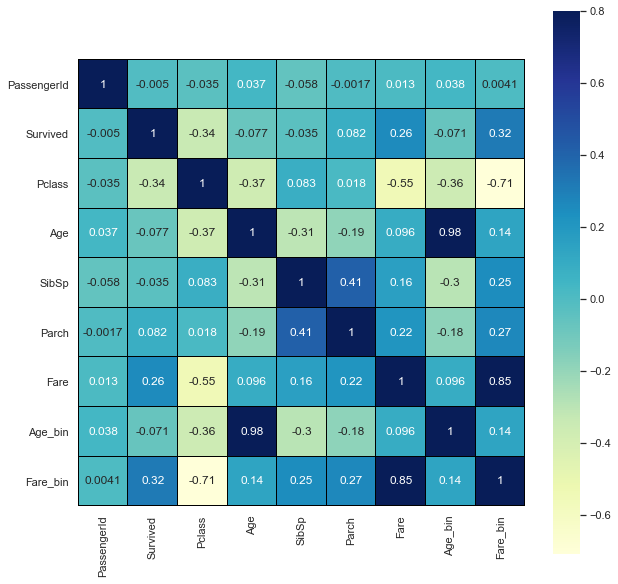

In [293]:
# Correlation --> heatmap

corr = titanic_data.corr()
plt.figure(figsize =(10,10))

sns.heatmap(corr, vmax = 0.8, linewidth = 0.01, square = True, annot = True, cmap = 'YlGnBu', linecolor = 'black')
#plt.title('Correlation between features')